In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro.infer.kernels as kernels
from numpyro.infer.kernels import SteinKernel
from numpyro.infer.autoguide import AutoDelta
from numpyro.infer.initialization import init_with_noise
from numpyro.infer.stein import SVGD
from numpyro.distributions import NormalMixture
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(42)
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(np.array([1/3, 2/3]), 
                                      np.array([-2., 2.]), np.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(), num_particles=100)
svgd_state = svgd.init(rng_key)

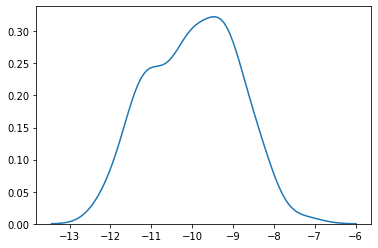

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.056: 100%|██████████| 1500/1500 [00:05<00:00, 260.23it/s]


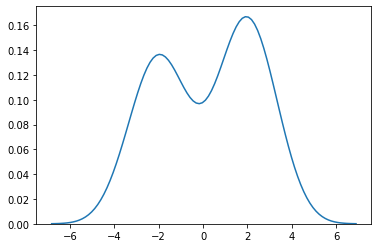

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([-0.01718227, -0.49379626,  1.2356279 , -3.1099398 ,
             -2.65762   ,  0.53842705,  2.7060137 , -3.6048124 ,
              1.8777722 ,  1.565097  ,  2.5166402 ,  1.8846487 ,
              2.3381047 ,  1.4603505 ,  2.1209111 ,  1.7478404 ,
             -2.3583562 ,  3.7030575 , -1.6707212 ,  3.3901873 ,
              0.89472383, -0.01911395, -0.7586862 ,  2.1370883 ,
             -2.249132  , -0.7530684 ,  1.5864592 ,  1.7961253 ,
              1.3185459 , -1.5935339 , -0.5832951 ,  2.4523263 ,
              1.925987  ,  1.1430577 , -2.2507043 , -3.743829  ,
              2.617384  , -1.7793746 ,  1.9863579 , -1.1734577 ,
             -1.6814636 ,  0.6571445 , -1.9854963 ,  3.8113122 ,
              2.9847074 , -2.706539  ,  2.7098327 ,  2.3974285 ,
              2.3079512 , -1.1319085 , -0.9534277 ,  2.2867708 ,
             -2.4612663 ,  3.0305233 , -1.1107925 , -2.7796626 ,
              1.6902906 , -1.2755647 ,  3.4402394 , -2.2704635 ,
              2.855209  ,

In [9]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.LinearKernel(), num_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.3079: 100%|██████████| 1500/1500 [00:02<00:00, 506.88it/s]


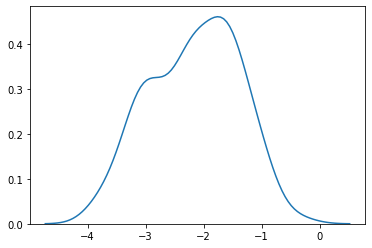

In [10]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [11]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RandomFeatureKernel(), num_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations * 2)

SVGD 2.0505: 100%|██████████| 3000/3000 [00:23<00:00, 127.64it/s]


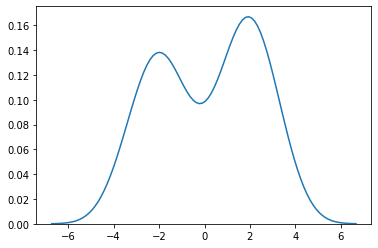

In [12]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [14]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.IMQKernel(), num_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.0929: 100%|██████████| 1500/1500 [00:03<00:00, 462.20it/s]


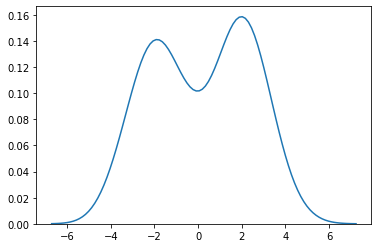

In [15]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [16]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value(values={'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.MixtureKernel([0.5, 0.5], [kernels.LinearKernel(), kernels.RandomFeatureKernel()]),
            num_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.3035: 100%|██████████| 1500/1500 [00:12<00:00, 120.04it/s]


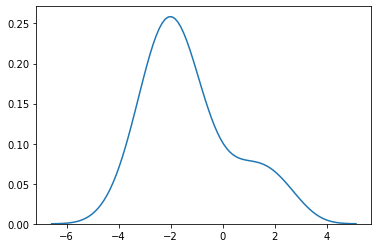

In [17]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])